# Goals
My goal with this dataset is it use a regression machine learning model to accurately predict the price of a house dependent on features. I will also look through some data analysis and a few other features such as PCA

## Process 
I’ll be following a typical data science pipeline, “OSEMN”.

1. Obtaining the data is the first approach in solving the problem.

2. Scrubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. Exploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationships between features.

4. Modeling the data will give us our predictive power on whether an employee will leave.

5. INterpreting the data is last. With all the results and analysis of the data, what conclusion is made?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

## 1.0 Obtatining the data

The data I'm using has been taken from Kaggle and takes in appartment sales in Daegu, South Korea from 2007 to 2017. This dataset is particularly interesting as it contains many interesting features for us to analyse. Another reason this dataset is interesting is due to the fact that it contains 10 years of data, which allows us to undertake some interesting time analysis.

In [3]:
df = pd.read_csv('daegu_housing.csv')

In [4]:
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


## 2.0 Scrubbing the data

The first stage of the process is scrub the data. This means I will be searching the data for any missing data, and making sure the data frame is in an easily readable format.

In [5]:
# Checking to see if any of the features have missing data
df.isnull().any()

SalePrice                             False
YearBuilt                             False
YrSold                                False
MonthSold                             False
Size(sqf)                             False
Floor                                 False
HallwayType                           False
HeatingType                           False
AptManageType                         False
N_Parkinglot(Ground)                  False
N_Parkinglot(Basement)                False
TimeToBusStop                         False
TimeToSubway                          False
N_APT                                 False
N_manager                             False
N_elevators                           False
SubwayStation                         False
N_FacilitiesNearBy(PublicOffice)      False
N_FacilitiesNearBy(Hospital)          False
N_FacilitiesNearBy(Dpartmentstore)    False
N_FacilitiesNearBy(Mall)              False
N_FacilitiesNearBy(ETC)               False
N_FacilitiesNearBy(Park)        

## 3.0 Exploring the data

I have confirmed that there is no missing data and am happy with the layout of the rest of the data frame. Now I will explore a few areas that intrigue me most. This stage of the process is incredibly important, especially if it's your first time using it, as it allows you to understand the data more and the relationships held within.

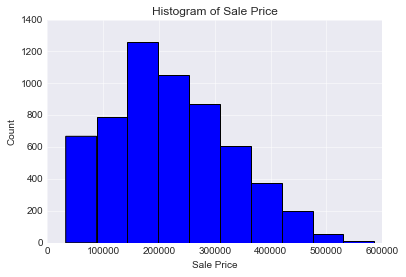

In [6]:
# To begin with I will look at the distribution of prices across the dataset

df['SalePrice'].hist()
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Histogram of Sale Price')

The relationship between sale price and square foot is always an interesting one to plot. Here we can see that there is a strong correlation, and also from this we can see that the square foot data is trenched. The same square footage can be sold for a wide range of prices. There is a trench at approx. 900 sqft which is sold for between 50,000 and 450,000. This helps us understand that there are other significant factors in play here.

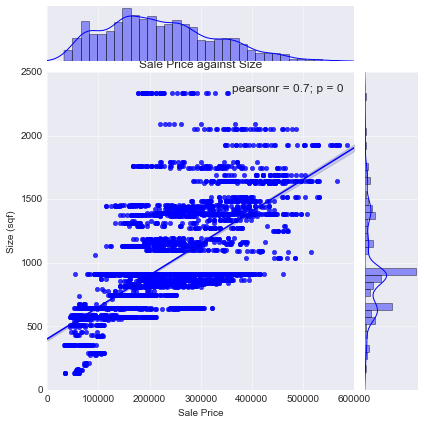

In [10]:
sns.jointplot(x='SalePrice',y='Size(sqf)',data=df,kind='reg',xlim=(0,600000),ylim=(0,2500))
plt.xlabel('Sale Price')
plt.ylabel('Size (sqf)')
plt.title('Sale Price against Size')

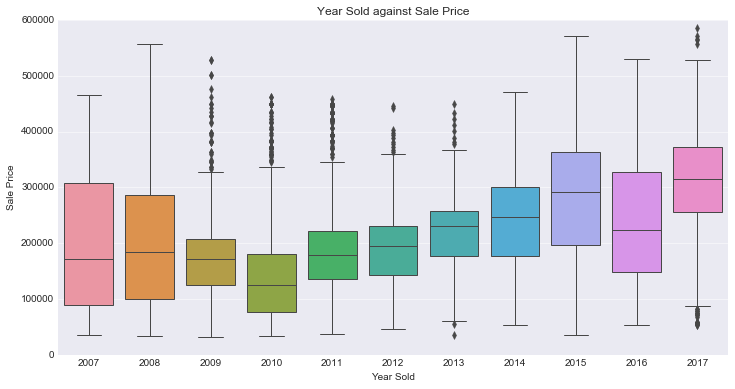

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='YrSold',y='SalePrice',data=df)
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Year Sold against Sale Price')

### 3.1 Deeper exploration

Now that we have looked at some overarching trends within the data, I would like to explore two themes in more depth. Those are:

1. The affordable housing within the city
2. The price according to which subway station you are near

### 3.1.1 House affordability
I will be looking at house affordability in 2017. I was unable to find reliable data for the average salary in Daegu from 2007 onwards so it would be unfair and crude to just adjust for inflation as there are many other factors at play here. I instead will be looking at the distribution of affordability in just 2017.

To do this I found the UN's housing affordability index which is calculated as house price/average salary.

In [204]:
# The mean salary in Daegu for 2017 in dollars
avg_sal_2017 = 39000

def affordability(price):
    # UN housing affordability index formula
    index = price/39000
    if index >= 5.1:
        return 'Severely Unaffordable'
    if  4.1 <= index <= 5.0:
        return 'Seriously Unaffordable'
    if  3.1 <= index <= 4.0:
        return 'Moderately Unaffordable'
    if index <= 3.0:
        return 'Affordable'
    
df['Affordability_index'] = df['SalePrice'].apply(lambda x: affordability(x))

In [215]:
df[df['YrSold'] == 2017]['Affordability_index'].value_counts(n)

Severely Unaffordable      514
Affordable                  38
Seriously Unaffordable      24
Moderately Unaffordable     20
Name: Affordability_index, dtype: int64

From our rough calculations we can see that only a small proportion of appartments sold in Daegu in 2017 were classes as affordable.

### 3.1.2 Price relating to subway station 
One area of the data that I'm particualrly interested in is the nearest subway station. I'm particularly interested to see if certain subway stations relate to a higher price point, and the development of these prices over time.

First I will look at the stations in the data and the frequency count

In [122]:
df['SubwayStation'].value_counts()

Kyungbuk_uni_hospital    1644
Myung-duk                1507
Banwoldang                748
Bangoge                   737
Sin-nam                   651
no_subway_nearby          404
Chil-sung-market          115
Daegu                      85
Name: SubwayStation, dtype: int64

There are several ways to undertake this analysis. I have decided to make a data frame for each station and then undertake the analysis off of this.

In [124]:
Kyungbuk = pd.DataFrame(data=df[df['SubwayStation'] == 'Kyungbuk_uni_hospital'],columns=['SalePrice','YrSold'])
Myung_duk = pd.DataFrame(data=df[df['SubwayStation'] == 'Myung-duk'],columns=['SalePrice','YrSold'])
Banwoldang  = pd.DataFrame(data=df[df['SubwayStation'] == 'Banwoldang'],columns=['SalePrice','YrSold'])
Bangoge = pd.DataFrame(data=df[df['SubwayStation'] == 'Bangoge'],columns=['SalePrice','YrSold'])
Sin_nam = pd.DataFrame(data=df[df['SubwayStation'] == 'Sin-nam'],columns=['SalePrice','YrSold'])
no_subway_nearby = pd.DataFrame(data=df[df['SubwayStation'] == 'no_subway_nearby'],columns=['SalePrice','YrSold'])
Chil_sung_market = pd.DataFrame(data=df[df['SubwayStation'] == 'Chil-sung-market'],columns=['SalePrice','YrSold'])
Daegu = pd.DataFrame(data=df[df['SubwayStation'] == 'Daegu'],columns=['SalePrice','YrSold'])

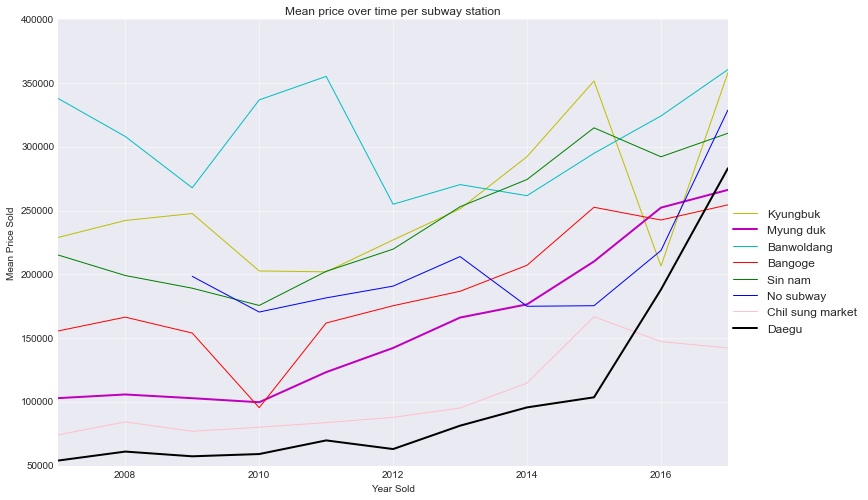

In [229]:
fig, ax = plt.subplots(figsize=(12,8))

Kyungbuk.groupby('YrSold').mean().plot(ax=ax,color='y')
Myung_duk.groupby('YrSold').mean().plot(ax=ax,color='m',linewidth=2)
Banwoldang.groupby('YrSold').mean().plot(ax=ax,color='c')
Bangoge.groupby('YrSold').mean().plot(ax=ax,color='r')
Sin_nam.groupby('YrSold').mean().plot(ax=ax,color='g')
no_subway_nearby.groupby('YrSold').mean().plot(ax=ax,color='b')
Chil_sung_market.groupby('YrSold').mean().plot(ax=ax,color='pink')
Daegu.groupby('YrSold').mean().plot(ax=ax,color='k',linewidth=2)

plt.xlabel('Year Sold')
plt.ylabel('Mean Price Sold')
plt.title('Mean price over time per subway station')
ax.legend(['Kyungbuk','Myung duk','Banwoldang','Bangoge','Sin nam','No subway','Chil sung market','Daegu'],loc='upper center',bbox_to_anchor=(1.1, 0.6))

There are two stations here which seemingly have grown in popularity over the past 10 years. They are: Daegu and Myung Duk, both highlighted in the plot. The mean house price in those areas has increased dramatically over the past 10 years. 

# 4.0 Modelling the data
I have undertook some analysis into the data, now I will fit my machine learning model. In this project I have chosen to use the linear regression model.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 4.1 First iteration of the model
This is my first iteration of the model, the only adjustments I will be making are that I will be removing the features that are strings as the machine learning model cannot take this data in. I will drop these columns from the data frame, split the data into training and testing data, and then fit the model.

In [131]:
df_non_string = df.drop(['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation', 'TimeToBusStop', 'TimeToSubway'],axis=1)

In [132]:
x = df_non_string.drop('SalePrice',axis=1)
y = df_non_string['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
predictions = lr.predict(x_test)

Now that I have created my predictions for the test data it is important to see how effective it was. One way to do this is to look at it visually. To do so I will create a scatter plot of Predictions against the actual Test Data. The more correlated this data is, the more accurate my model is.

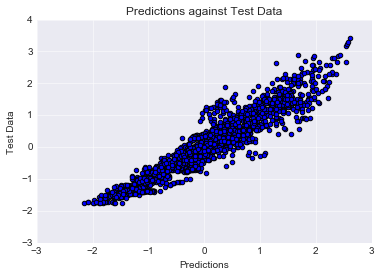

In [230]:
plt.scatter(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Test Data')
plt.title('Predictions against Test Data')

To test the effectiveness of the model in an analytical manner I will use the linear regression score

In [135]:
from sklearn.metrics import mean_squared_error
print('The Linear Regression score for the training data is: {}'.format(lr.score(x_train,y_train)))
print('The Linear Regression score for the test data is: {}'.format(lr.score(x_test,y_test)))

The Linear Regression score for the training data is: 0.8571799858756411
The Linear Regression score for the test data is: 0.8694713300352053


## 4.2 Improving the model
To improve the accuracy of this model I will be using 3 methods.
1. Categorical features
2. Rescale data
3. PCA

### 4.2.1 Adding categorical features
I believe that the best way to improve the accuracy of this model is to add categorical features. In the first interation I dropped the string based features from the model, however to improve accuracy I will convert these to categorical features. 

In [136]:
hallway = pd.get_dummies(df['HallwayType'])
heating = pd.get_dummies(df['HeatingType'])
manager_type = pd.get_dummies(df['AptManageType'])
bus_time = pd.get_dummies(df['TimeToBusStop'])
subway_time = pd.get_dummies(df['TimeToSubway'])
subway = pd.get_dummies(df['SubwayStation'])
ready_data = pd.concat([df,hallway,heating,manager_type,bus_time,subway_time,subway],axis=1)
ready_data.drop(['HallwayType', 'HeatingType', 'AptManageType','TimeToBusStop', 'TimeToSubway', 'SubwayStation'],inplace=True,axis=1)

In [137]:
ready_data.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,5min~10min,no_bus_stop_nearby,Bangoge,Banwoldang,Chil-sung-market,Daegu,Kyungbuk_uni_hospital,Myung-duk,Sin-nam,no_subway_nearby
0,141592,2006,2007,8,814,3,111.0,184.0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0
1,51327,1985,2007,8,587,8,80.0,76.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,48672,1985,2007,8,587,6,80.0,76.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,0
3,380530,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,...,0,0,0,0,0,0,0,0,1,0
4,221238,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
x = ready_data.drop('SalePrice',axis=1)
y = ready_data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
predictions = lr.predict(x_test)

In [140]:
print('The Linear Regression score for the training data is: {}'.format(lr.score(x_train,y_train)))
print('The Linear Regression score for the test data is: {}'.format(lr.score(x_test,y_test)))

The Linear Regression score for the training data is: 0.8854353603098095
The Linear Regression score for the test data is: 0.8849851656488057


### 4.2.2 Rescale the data
To further improve the accuracy I believe that rescaling the data will help. I will use the StandardScaler to standardise my data and center it around 0.

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()
scaler.fit(ready_data)
scaled_data = pd.DataFrame(scaler.transform(ready_data),columns=ready_data.columns)

In [143]:
x = scaled_data.drop('SalePrice',axis=1)
y = scaled_data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [144]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
predictions = lr.predict(x_test)

In [146]:
print('The Linear Regression score for the training data is: {}'.format(lr.score(x_train,y_train)))
print('The Linear Regression score for the test data is: {}'.format(lr.score(x_test,y_test)))

The Linear Regression score for the training data is: 0.8889730887897669
The Linear Regression score for the test data is: 0.8776683338912473


### 4.2.3 What effect would PCA have?
Principal Component Analysis (PCA) is a method to reduce the number of components within a dataframe whilst still maintaining a high level of accuracy. I don't think this will improve the accuracy of the model drastically, however I am interested to see if this makes a slight improvement. I am also aware that if this dataset were to have a large number of features, this would be an important step to speed up training.

In [147]:
from sklearn.decomposition import PCA

In [148]:
df_data = scaled_data.drop('SalePrice',axis=1)
df_target = scaled_data['SalePrice']

In [149]:
pca = PCA(n_components=.95) #We want to cover 95% of variance
pca.fit(df_data)
pca_data = pd.DataFrame(pca.transform(df_data))
pca.n_components_

17

In [150]:
x_train, x_test, y_train, y_test = train_test_split(df_data,df_target,test_size=0.33)

In [151]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
predictions = lr.predict(x_test)
print('The Linear Regression score for the training data is: {}'.format(lr.score(x_train,y_train)))
print('The Linear Regression score for the test data is: {}'.format(lr.score(x_test,y_test)))

The Linear Regression score for the training data is: 0.8844807939603948
The Linear Regression score for the test data is: 0.8870784558641456


## 5.0 Interpreting the results
I have gone through all the stages of my data exploration, and I believe that I have been able to pull out some interesting insights and been able to create an accurate machine learning model for predicting the price of an appartment in Daegu, South Korea. Some interesting points from this exploration:

1. Affordable areas of the city have, in the past 10 years, become unaffordable (3.1.1)
2. Affordable housing in Daegu is lacking (3.1.2)
3. The largest increase in model accuracy was by adding categorical features (4.2.1)